In [7]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [8]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [12]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
DataFile = ROOT.TFile("/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1037652810.root","read")
DataHisto=DataFile.Get('data')

In [0]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
from ROOT import gROOT, gBenchmark
import numpy as np
import matplotlib.pyplot as plt
#from scipy import integrate
from matplotlib import cm

Data=ROOT.TChain("SystemTree") #the name of the tree in the root file
Data.Add("/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1037652810.root")

NumberOfEventsToCheck=Data.GetEntries() #entradas=eventos
print("We are going to analyze ",NumberOfEventsToCheck, " events")

DataHist= ROOT.TH1F("DataHist", "Data Histogram", 250, 0, 1500) # (bins, from xrange, to xrange) #in 1000 it looks very nice
c1 = ROOT.TCanvas( 'c1', 'Histogram display', 100, 10, 700, 900 ) #(,,,height)
for entry in Data:
  xvalue=entry.x
  DataHist.Fill(xvalue)

c1.SetFillColor( 15 ) # 0 is white # 15 gray
DataHist.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

#Second point

def IF(t,x,u,c): #integrand
  return np.exp(-t)*np.cos(t*((x-u)/c)+2.*t*np.log(t/c)/np.pi)

def LandauPDF(x,u,c): #x, mean, standard deviation""
  LandInt = ROOT.TMath.Landau(x,u,c,True) 
  return LandInt

""" 
def LandauPDF(x,u,c): #x, mean, standard deviation""
  I, ErrorI=integrate.quad(IF,0.,np.inf,args=(x,u,c)) #doing the integral
  #print(I)
  Probxf=I/(np.pi*c)
  return Probxf
"""

#pdf=LandauPDF(1,2,3)
#print(pdf)

N=85000 #NumberOfEventsToCheck # where N is also the size of the sample generated with LandauProbabilityDensityFunction
a=0
b=1500 #histogram shape according to xrange

import random 
#generate random numbers
x0=(b-a)*random.random() +a
X=[] #distribution to create with metropolis algorithm
X.append(x0)


while (len(X)<(N)): ###Maybe N has to be changed to get N data points, caus the algorithem reject some of them??
  xp=(b-a)*random.random()+a
  DeltaS=-np.log(LandauPDF(xp,170.1,1.3)/LandauPDF(X[-1],170.1,1.3)) #xp,initial guess of "mean" u according to the data
  #condiciones para incluir phi prima
  if (DeltaS<0):
      xi=xp
      X.append(xi)

  if (DeltaS>0):
      P=LandauPDF(xp,170.1,1.3)/(LandauPDF(X[-1],170.1,1.3))
      probv=random.random()
      if probv<P:
          xi=xp
          X.append(xi) 
 
#print(len(X))
#plt.hist(X,bins=250)
#plt.show()


#THIRD POINT

N=NumberOfEventsToCheck # where N is also the size of the sample generated with LandauProbabilityDensityFunction
a=0
b=1500 #histogram shape according to xrange

import random 

Mu=np.arange(195,205,1) #random interval the smaller chi squared
C=np.arange(40,41,0.1)
Samples=[]
AllChi2=[]
print(len(Mu))


#to generate the samples for each ui and ci wiith metropolis algorithm
#un=0
for ui in Mu:
  AllChi2Rows=[] #to store all c for each ui
  #un+=1 #contador para el entero de el valor ui, concretamente i para guardar el valor de chi2 correspondiente a ui
  for ci in C:
      X=[0.]*(N) #the list for each sample generated by metropolis algorithm
      #generate random numbers
      x0=(b-a)*random.random() +a
      X=[] #distribution to create with metropolis algorithm
      X.append(x0)
      while (len(X)<(N)): ###Maybe N has to be changed to get N data points, caus the algorithem reject some of them??
            if (LandauPDF(X[-1],ui,ci)!=0):
               xp=(b-a)*random.random()+a
               DeltaS=-np.log(LandauPDF(xp,ui,ci)/LandauPDF(X[-1],ui,ci)) #xp,initial guess of "mean" u according to the data
               #create and fill the tree
               #from array import array
               #MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )
               #x1 = array( 'i', [ 0 ] )
               #MyTree.Branch( 'x1', x1, 'x1/I' )
               #condiciones para incluir phi prima
               if (DeltaS<0):
                  xi=xp
                  X.append(xi)
                  #x1[0]=xp #to fill the tree
                  #MyTree.Fill()
                
               if (DeltaS>0):
                   P=LandauPDF(xp,ui,ci)/(LandauPDF(X[-1],ui,ci))
                   probv=random.random()
                   if probv<P:
                      xi=xp
                      X.append(xi)
                      #x1[0]=xp #to fill the tree
                      #MyTree.Fill() 
      Samples.append(X)

      #chisquared

      chi2=0 #empieza desde 0 para cada valor de u y c que es el parametro
      chi2df=0
      for l in range(N): #For to calculate Chi Squared (for each ui and ci value)
          if (DataHist.GetBinContent(l)!=0):
              chi2+=(DataHist.GetBinContent(l)-X[l])**2/DataHist.GetBinContent(l)
      #print(chi2)
      chi2df=chi2/250 #divided degres of freedem i.e. number of bins
      AllChi2Rows.append(chi2df)
  AllChi2.append(AllChi2Rows)

print(len(Samples))
#print(Samples[0])
print(len(AllChi2))
print(len(AllChi2Rows))
#print(AllChi2[0])

def Chi2Distr3Df(X,Y): #where x is u and c is y
    for xii in range(len(X)):
      for yii in range(len(Y)):
        #if (AllChi2[xii][yii]!="NaN"):
          return AllChi2[xii][yii]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(3)
ax = fig.gca(projection='3d')
Mu=np.array(Mu)
C=np.array(C)
D1Mu=Mu
D1C=C
print(Mu.shape,C.shape)
Mu,C = np.meshgrid(Mu,C)
print(Mu.shape,C.shape)
AllChi2=np.array(AllChi2)
print(AllChi2, len(AllChi2))
ax.plot_surface(Mu,C,AllChi2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Mu')
ax.set_ylabel('C')
ax.set_zlabel('Chi Squared')
"""
fig = plt.figure(4)
ax = fig.gca(projection='3d')
Chi2z=Chi2Distr3Df(Mu,C)
#print(Chi2Distr3Df(Mu[0],C[0]))
#ax.plot_surface(Mu,C,Chi2z)
ax.plot_wireframe(Mu,C,AllChi2, rstride=10, cstride=10)
fig = plt.figure(5)
ax = fig.gca(projection='3d')
ax.scatter(Mu,C,AllChi2)
"""
plt.show()


#the next part is to find the minium chi2 and the corresponding ui and ci
Chis2=AllChi2
def findindex(AllChi2,X,Y,Min):
    for xii in range(len(X)):
      for yii in range(len(Y)):
        if AllChi2[xii][yii]==Min:
        #if (AllChi2[xii][yii]!="NaN"):
           #print(ii,jj)
           return xii, yii

AllChi2=np.reshape(AllChi2,len(Mu)*len(C))
Min=min(AllChi2)
#pos=AllChi2.index(Min)
print("minimo de chi^2/ndf",Min)
#print("pos",pos)
ii,jj =findindex(Chis2,Mu,C,Min)
print("valores optimos de ui y ci respectivamente")
print(D1Mu[ii],D1C[jj])


#Finally we're gonna create de histogram in the same histograme already made, as done in point 2 but for the best ui and ci 
#so this could be considered point number 2 with best ui and ci
N=85000 #NumberOfEventsToCheck # where N is also the size of the sample generated with LandauProbabilityDensityFunction
a=0
b=1500 #histogram shape according to xrange

import random 
#generate random numbers
x0=(b-a)*random.random() +a
X=[] #distribution to create with metropolis algorithm
X.append(x0)


while (len(X)<(N)): ###Maybe N has to be changed to get N data points, caus the algorithem reject some of them??
  xp=(b-a)*random.random()+a
  DeltaS=-np.log(LandauPDF(xp,D1Mu[ii],D1C[jj])/LandauPDF(X[-1],D1Mu[ii],D1C[jj])) #xp,initial guess of "mean" u according to the data
  #condiciones para incluir phi prima
  if (DeltaS<0):
      xi=xp
      X.append(xi)

  if (DeltaS>0):
      P=LandauPDF(xp,D1Mu[ii],D1C[jj])/(LandauPDF(X[-1],D1Mu[ii],D1C[jj]))
      probv=random.random()
      if probv<P:
          xi=xp
          X.append(xi) 
 
print(len(X))
plt.hist(X,bins=250)
plt.show()

#The histogram of the landau distribution generated by metropolis algorithm
MetropoLandauDistri= ROOT.TH1F("MetropoLandauDistri", "Metropolis Landau Distribution", 250, 50, 1500)
for j in range(N):
  MetropoLandauDistri.Fill(X[j])
MetropoLandauDistri.Draw("same")
MetropoLandauDistri.SetLineColor(2)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

We are going to analyze  85000  events


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.


20000


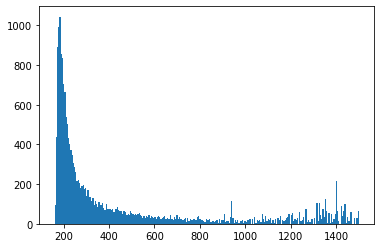

In [0]:
from multiprocessing import Process, Value, Array
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt
       
def IF(t,x,u,c): #integrand
  return np.exp(-t)*np.cos(t*((x-u)/c)+2.*t*np.log(t/c)/np.pi)

def LandauPDF(x,u,c): #x, mean, standard deviation""
  I = ROOT.TMath.Landau(x,c,u) #doing the integral
  #print(I)
  Probxf=I #/(np.pi*c)
  return Probxf

def fuck(u): 
    N=20000      
    a=0
    b=1500 #histogram shape according to xrange

    import random 
#generate random numbers
    x0=(b-a)*random.random() +a
    X=[] #distribution to create with metropolis algorithm
    X.append(x0)

    contador=0
    while (contador<(N-1)): ###Maybe N has to be changed to get N data points, caus the algorithem reject some of them??
      xp=(b-a)*random.random()+a
      DeltaS=-np.log(LandauPDF(xp,u,50.3)/LandauPDF(X[-1],u,50.3)) #xp,initial guess of "mean" u according to the data
  #condiciones para incluir phi prima
      if (DeltaS<0):
          xi=xp
          X.append(xi)
          contador+=1 

      if (DeltaS>0):
          P=LandauPDF(xp,u,50.3)/(LandauPDF(X[-1],u,50.3))
          probv=random.random()
          if probv<P:
              xi=xp
              X.append(xi) 
              contador+=1 
  

    print(len(X))
    plt.hist(X,bins=250)
    plt.show()
fuck(170.1)